This is the copy of xi_dd_cutbox.ipynb, correct the mistake of cutting simulation box.

Code using the module count_pair_DDsmu6 and main program corrfunc_cutbox7.f90 in my fortran code, after revise the mistake of cutbox in main program ver.5. The box is cut in z direction, consider nonPBC case. Compare to the previous results using fullbox PBC.

For density auto-correlation function $\xi_{dd,l}$ monopole in real space.

In [55]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
path ='/Users/ngoc/Desktop/Master-study/project'

In [56]:
#cosmological parameters
z        = 0.306                   #redshift
f        = 0.687255861             #growth rate
Omg_lamb = 0.685                   #dark energy density parameter
Omg_m    = 1. - Omg_lamb           #matter density parameter
a        = 1./(1. + z)             #scale factor
E_a      = np.sqrt(Omg_m*(1.+z)**3. + Omg_lamb) 


In [57]:
#simulation paramters
boxsize  = 2000                    #length of 1D of the box [Mpc/h]
nbins    = 50                      #number of bins
rmin     = 1.
rmax     = boxsize/3
bins     = np.logspace(np.log10(rmin), np.log10(rmax), nbins+1)     
mu_max   = 1                       #maximum value of cosine of the angle separated from the LOS
nmu_bins = 10                      #number of bins of the angle separation 
delta_mu = mu_max/nmu_bins
ndata    = 8                       #number of data
realizations = "12345678"          #for reading the data

#Legendre polynomials
P0 = 1
P2 = lambda mu: (3*mu**2-1)/2
P4 = lambda mu: (35*mu**4 - 30*mu**2 + 3)/8 

l0 = 0
l2 = 2

b        = 3.11   

In [58]:
# result of full simulation box + PBC
xi_dd       = np.loadtxt(path+'/my-p-code/xi_dd_realspace.txt', usecols = 1)
rdd         = np.loadtxt(path+'/my-p-code/xi_dd_realspace.txt', usecols = 0)
error_xi_dd = np.loadtxt(path+'/my-p-code/xi_dd_realspace.txt', usecols = 2)

In [59]:
#load the theory curve and the cut of theory
xi_dd_th    = np.loadtxt(path+'/my-f-code/results/xi-dd-th.txt', usecols = 1)
xi_dd_th    *= b**2
xi_dd_th_cut= np.loadtxt(path+'/my-f-code/results/xi-dd-th-cut.txt', usecols = 1)
xi_dd_th_cut*= b**2

In [60]:
A_03 = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/dd-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RR-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
        
    xi0_nonPBC = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += (DDsmu_nonPBC[j]/RR_mus-1)*P0*delta_mu 

    #monopole    
    A_03[i] = xi0_nonPBC

# calculate the average of 8 realizations and error bars, F code
xi_03 = np.zeros(nbins)

for i in range(0,nbins):
    xi_03[i] = np.mean(A_03[0:ndata,i])

error_xi_03 = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    for j in range(0,ndata):
        a0 += (A_03[j,i] - xi_03[i])**2
    error_xi_03[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean


<ipython-input-60-4033ee6a4b87>:17: RuntimeWarning: invalid value encountered in double_scalars
  xi0_nonPBC[ii] += (DDsmu_nonPBC[j]/RR_mus-1)*P0*delta_mu
<ipython-input-60-4033ee6a4b87>:17: RuntimeWarning: divide by zero encountered in double_scalars
  xi0_nonPBC[ii] += (DDsmu_nonPBC[j]/RR_mus-1)*P0*delta_mu


In [61]:
A_03 = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/dd-cutbox03L-testOMP-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RR-cutbox03L-testOMP-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    
    DR = np.loadtxt(path+'/my-f-code/results/DR-cutbox03L-testOMP-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    xi0_nonPBC = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu 

    #monopole    
    A_03[i] = xi0_nonPBC

# calculate the average of 8 realizations and error bars, F code
xi_03_OMP = np.zeros(nbins)

for i in range(0,nbins):
    xi_03_OMP[i] = np.mean(A_03[0:ndata,i])

error_xi_03_OMP = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    for j in range(0,ndata):
        a0 += (A_03[j,i] - xi_03_OMP[i])**2
    error_xi_03_OMP[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean


<ipython-input-61-438a1bf0e332>:19: RuntimeWarning: invalid value encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu
<ipython-input-61-438a1bf0e332>:19: RuntimeWarning: divide by zero encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu
<ipython-input-61-438a1bf0e332>:34: RuntimeWarning: invalid value encountered in double_scalars
  a0 += (A_03[j,i] - xi_03_OMP[i])**2


In [62]:
#LS estimator
A_03 = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/dd-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RR-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DR-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
        
    xi0_nonPBC = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu 

    #monopole    
    A_03[i] = xi0_nonPBC

# calculate the average of 8 realizations and error bars, F code
xi_03_LS = np.zeros(nbins)

for i in range(0,nbins):
    xi_03_LS[i] = np.mean(A_03[0:ndata,i])

error_xi_03_LS = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    for j in range(0,ndata):
        a0 += (A_03[j,i] - xi_03_LS[i])**2
    error_xi_03_LS[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean


<ipython-input-62-f9f9b4621b53>:20: RuntimeWarning: invalid value encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu
<ipython-input-62-f9f9b4621b53>:20: RuntimeWarning: divide by zero encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu


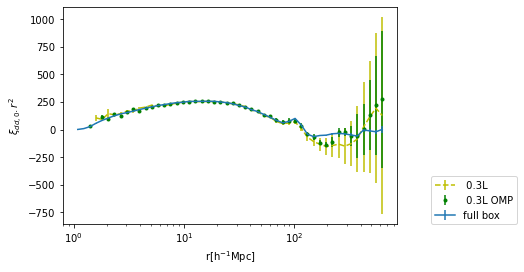

In [63]:
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.errorbar(rdd, xi_03*rdd**2, fmt ='y--', yerr = error_xi_03*rdd**2, label=" 0.3L")
#ax.errorbar(rdd, xi_03_LS*rdd**2, fmt ='r:', yerr = error_xi_03_LS*rdd**2, label=" 0.3L LS")
ax.errorbar(rdd, xi_03_OMP*rdd**2, fmt ='g.', yerr = error_xi_03_OMP*rdd**2, label=" 0.3L OMP")
ax.errorbar(rdd, xi_dd*rdd**2, fmt ='-', yerr = error_xi_dd*rdd**2, label="full box")
ax.set_ylabel("$\\xi_{dd,0}.r^2$")
ax.set_xlabel("r[h$^{-1}$Mpc]")
#ax.set_xlim(100,)
#ax.set_ylim(-8000,8000)
ax.legend(loc=(1.1,0))
#plt.savefig('dd-cutbox-correct.pdf')
#plt.savefig('dd-cutbox-correct.png')

In [64]:
A_05 = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/dd-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RR-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
        
    xi0_nonPBC = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += (DDsmu_nonPBC[j]/RR_mus-1)*P0*delta_mu 

    #monopole    
    A_05[i] = xi0_nonPBC

# calculate the average of 8 realizations and error bars, F code
xi_05 = np.zeros(nbins)

for i in range(0,nbins):
    xi_05[i] = np.mean(A_05[0:ndata,i])

error_xi_05 = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    for j in range(0,ndata):
        a0 += (A_05[j,i] - xi_05[i])**2
    error_xi_05[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean


<ipython-input-64-9e27cdd546a0>:17: RuntimeWarning: divide by zero encountered in double_scalars
  xi0_nonPBC[ii] += (DDsmu_nonPBC[j]/RR_mus-1)*P0*delta_mu
<ipython-input-64-9e27cdd546a0>:17: RuntimeWarning: invalid value encountered in double_scalars
  xi0_nonPBC[ii] += (DDsmu_nonPBC[j]/RR_mus-1)*P0*delta_mu


In [65]:
#LS estimator
A_05 = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/dd-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RR-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DR-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
        
    xi0_nonPBC = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu 

    #monopole    
    A_05[i] = xi0_nonPBC

# calculate the average of 8 realizations and error bars, F code
xi_05_LS = np.zeros(nbins)

for i in range(0,nbins):
    xi_05_LS[i] = np.mean(A_05[0:ndata,i])

error_xi_05_LS = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    for j in range(0,ndata):
        a0 += (A_05[j,i] - xi_05_LS[i])**2
    error_xi_05_LS[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean


<ipython-input-65-e21626f55ad4>:20: RuntimeWarning: divide by zero encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu
<ipython-input-65-e21626f55ad4>:20: RuntimeWarning: invalid value encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu


In [66]:
#LS estimator
A_05 = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/dd-cutbox05L-testOMP-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RR-cutbox05L-testOMP-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DR-cutbox05L-testOMP-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
         
    xi0_nonPBC = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu 

    #monopole    
    A_05[i] = xi0_nonPBC

# calculate the average of 8 realizations and error bars, F code
xi_05_OMP = np.zeros(nbins)

for i in range(0,nbins):
    xi_05_OMP[i] = np.mean(A_05[0:ndata,i])

error_xi_05_OMP = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    for j in range(0,ndata):
        a0 += (A_05[j,i] - xi_05_OMP[i])**2
    error_xi_05_OMP[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean


<ipython-input-66-95afd14ca90b>:20: RuntimeWarning: divide by zero encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu
<ipython-input-66-95afd14ca90b>:20: RuntimeWarning: invalid value encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu


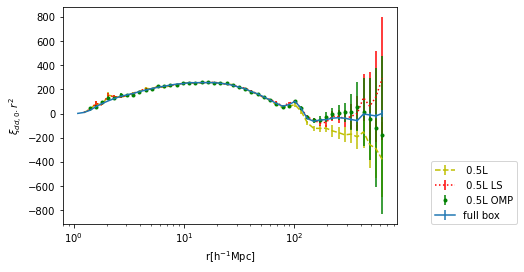

In [67]:
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.errorbar(rdd, xi_05*rdd**2, fmt ='y--', yerr = error_xi_05*rdd**2, label=" 0.5L")
ax.errorbar(rdd, xi_05_LS*rdd**2, fmt ='r:', yerr = error_xi_05_LS*rdd**2, label=" 0.5L LS")
ax.errorbar(rdd, xi_05_OMP*rdd**2, fmt ='g.', yerr = error_xi_05_OMP*rdd**2, label=" 0.5L OMP")
ax.errorbar(rdd, xi_dd*rdd**2, fmt ='-', yerr = error_xi_dd*rdd**2, label="full box")
ax.set_ylabel("$\\xi_{dd,0}.r^2$")
ax.set_xlabel("r[h$^{-1}$Mpc]")
#ax.set_xlim(100,)
#ax.set_ylim(-8000,8000)
ax.legend(loc=(1.1,0))
#plt.savefig('dd-cutbox-correct.pdf')
#plt.savefig('dd-cutbox-correct.png')

In [68]:
A_07 = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DD = np.loadtxt(path+'/my-f-code/results/dd-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))

    # RR pairs count
    RR = np.loadtxt(path+'/my-f-code/results/RR-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
        
    xi0 = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mu = RR[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0[ii] += (DD[j]/RR_mu-1)*delta_mu 

    #monopole    
    A_07[i] = xi0

# calculate the average of 8 realizations and error bars, F code
xi_07 = np.zeros(nbins)

for i in range(0,nbins):
    xi_07[i] = np.mean(A_07[0:ndata,i])

error_xi_07 = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    for j in range(0,ndata):
        a0 += (A_07[j,i] - xi_07[i])**2
    error_xi_07[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
 

<ipython-input-68-26d0e995edff>:17: RuntimeWarning: divide by zero encountered in double_scalars
  xi0[ii] += (DD[j]/RR_mu-1)*delta_mu
<ipython-input-68-26d0e995edff>:17: RuntimeWarning: invalid value encountered in double_scalars
  xi0[ii] += (DD[j]/RR_mu-1)*delta_mu


In [69]:
#LS estimator
A_07 = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DD = np.loadtxt(path+'/my-f-code/results/dd-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))

    # RR pairs count
    RR = np.loadtxt(path+'/my-f-code/results/RR-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DR-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
         
    xi0 = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mu = RR[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0[ii] += ((DD[j]-2*DR[j])/RR_mu+1)*delta_mu 

    #monopole    
    A_07[i] = xi0

# calculate the average of 8 realizations and error bars, F code
xi_07_LS = np.zeros(nbins)

for i in range(0,nbins):
    xi_07_LS[i] = np.mean(A_07[0:ndata,i])

error_xi_07_LS = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    for j in range(0,ndata):
        a0 += (A_07[j,i] - xi_07_LS[i])**2
    error_xi_07_LS[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
 

<ipython-input-69-d49b9dfbab18>:20: RuntimeWarning: divide by zero encountered in double_scalars
  xi0[ii] += ((DD[j]-2*DR[j])/RR_mu+1)*delta_mu
<ipython-input-69-d49b9dfbab18>:20: RuntimeWarning: invalid value encountered in double_scalars
  xi0[ii] += ((DD[j]-2*DR[j])/RR_mu+1)*delta_mu


In [70]:
#LS estimator
A_07 = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DD = np.loadtxt(path+'/my-f-code/results/dd-cutbox07L-testOMP-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))

    # RR pairs count
    RR = np.loadtxt(path+'/my-f-code/results/RR-cutbox07L-testOMP-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DR-cutbox07L-testOMP-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
         
    xi0 = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mu = RR[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0[ii] += ((DD[j]-2*DR[j])/RR_mu+1)*delta_mu 

    #monopole    
    A_07[i] = xi0

# calculate the average of 8 realizations and error bars, F code
xi_07_OMP = np.zeros(nbins)

for i in range(0,nbins):
    xi_07_OMP[i] = np.mean(A_07[0:ndata,i])

error_xi_07_OMP = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    for j in range(0,ndata):
        a0 += (A_07[j,i] - xi_07_OMP[i])**2
    error_xi_07_OMP[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
 

<ipython-input-70-8631eb631665>:20: RuntimeWarning: divide by zero encountered in double_scalars
  xi0[ii] += ((DD[j]-2*DR[j])/RR_mu+1)*delta_mu
<ipython-input-70-8631eb631665>:20: RuntimeWarning: invalid value encountered in double_scalars
  xi0[ii] += ((DD[j]-2*DR[j])/RR_mu+1)*delta_mu


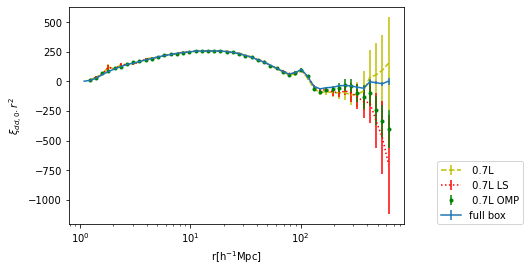

In [71]:
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.errorbar(rdd, xi_07*rdd**2, fmt ='y--', yerr = error_xi_07*rdd**2, label=" 0.7L")
ax.errorbar(rdd, xi_07_LS*rdd**2, fmt ='r:', yerr = error_xi_07_LS*rdd**2, label=" 0.7L LS")
ax.errorbar(rdd, xi_07_OMP*rdd**2, fmt ='g.', yerr = error_xi_07_OMP*rdd**2, label=" 0.7L OMP")
ax.errorbar(rdd, xi_dd*rdd**2, fmt ='-', yerr = error_xi_dd*rdd**2, label="full box")
ax.set_ylabel("$\\xi_{dd,0}.r^2$")
ax.set_xlabel("r[h$^{-1}$Mpc]")
#ax.set_xlim(100,)
#ax.set_ylim(-8000,8000)
ax.legend(loc=(1.1,0))
#plt.savefig('dd-cutbox-correct.pdf')
#plt.savefig('dd-cutbox-correct.png')

In [72]:

A_0f = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DD = np.loadtxt(path+'/my-f-code/results/dd-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))

    # RR pairs count
    RR = np.loadtxt(path+'/my-f-code/results/RR-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
        
    xi0 = np.zeros(nbins) 
    for ii in range(0,nbins):
        RR_mu = RR[ii]/nmu_bins      
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0[ii] += (DD[j]/RR_mu-1)*delta_mu 

    #monopole    
    A_0f[i] = xi0

# calculate the average of 8 realizations and error bars, F code
xi_f = np.zeros(nbins)

for i in range(0,nbins):
    xi_f[i] = np.mean(A_0f[0:ndata,i])

error_xi_f = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    for j in range(0,ndata):
        a0 += (A_0f[j,i] - xi_f[i])**2
    error_xi_f[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
 

In [73]:
#Landy-Szalay estimator
A_0f = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DD = np.loadtxt(path+'/my-f-code/results/dd-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))

    # RR, DR pairs count
    RR = np.loadtxt(path+'/my-f-code/results/RR-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DR-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))

    xi0 = np.zeros(nbins) 
    for ii in range(0,nbins):
        RR_mu = RR[ii]/nmu_bins      
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0[ii] += ((DD[j]-2*DR[j])/RR_mu+1)*delta_mu 

    #monopole    
    A_0f[i] = xi0

# calculate the average of 8 realizations and error bars, F code
xi_LS = np.zeros(nbins)

for i in range(0,nbins):
    xi_LS[i] = np.mean(A_0f[0:ndata,i])

error_xi_LS = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    for j in range(0,ndata):
        a0 += (A_0f[j,i] - xi_LS[i])**2
    error_xi_LS[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
 

In [74]:
#Landy-Szalay estimator, OMP
A_0f = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DD = np.loadtxt(path+'/my-f-code/results/dd-fullbox-testOMP-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))

    # RR, DR pairs count
    RR = np.loadtxt(path+'/my-f-code/results/RR-fullbox-testOMP-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DR-fullbox-testOMP-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))

    xi0 = np.zeros(nbins) 
    for ii in range(0,nbins):
        RR_mu = RR[ii]/nmu_bins      
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0[ii] += ((DD[j]-2*DR[j])/RR_mu+1)*delta_mu 

    #monopole    
    A_0f[i] = xi0

# calculate the average of 8 realizations and error bars, F code
xi_OMP = np.zeros(nbins)

for i in range(0,nbins):
    xi_OMP[i] = np.mean(A_0f[0:ndata,i])

error_xi_OMP = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    for j in range(0,ndata):
        a0 += (A_0f[j,i] - xi_OMP[i])**2
    error_xi_OMP[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
 

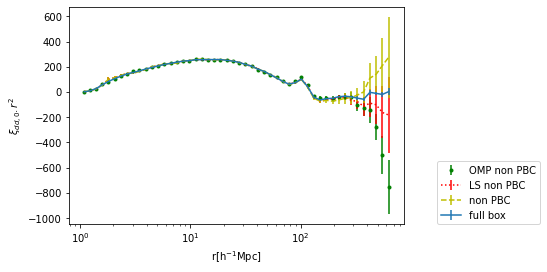

In [75]:
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.errorbar(rdd, xi_OMP *rdd**2, fmt ='g.', yerr = error_xi_OMP*rdd**2, label="OMP non PBC")
ax.errorbar(rdd, xi_LS *rdd**2, fmt ='r:', yerr = error_xi_LS*rdd**2, label="LS non PBC")
ax.errorbar(rdd, xi_f *rdd**2, fmt ='y--', yerr = error_xi_f*rdd**2, label="non PBC")
ax.errorbar(rdd, xi_dd*rdd**2, fmt ='-', yerr = error_xi_dd*rdd**2, label="full box")
ax.set_ylabel("$\\xi_{dd,0}.r^2$")
ax.set_xlabel("r[h$^{-1}$Mpc]")
#ax.set_xlim(100,)
#ax.set_ylim(-8000,8000)
ax.legend(loc=(1.1,0))
#plt.savefig('dd-cutbox-correct.pdf')
#plt.savefig('dd-cutbox-correct.png')

In [76]:
#Landy-Szalay estimator, full PBC
A_0f = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DD = np.loadtxt(path+'/my-f-code/results/dd-fullboxnew-PBC-realization'
                         +realizations[i]+'.txt', usecols = (0))

    # RR, DR pairs count
    RR = np.loadtxt(path+'/my-f-code/results/RR-fullboxnew-PBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DR-fullbox-PBC-realization'
                         +realizations[i]+'.txt', usecols = (0))

    xi0 = np.zeros(nbins) 
    for ii in range(0,nbins):
        RR_mu = RR[ii]/nmu_bins      
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0[ii] += ((DD[j]-2*DR[j])/RR_mu+1)*delta_mu 

    #monopole    
    A_0f[i] = xi0

# calculate the average of 8 realizations and error bars, F code
xi_pbc_LS = np.zeros(nbins)

for i in range(0,nbins):
    xi_pbc_LS[i] = np.mean(A_0f[0:ndata,i])

error_xi_pbc_LS = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    for j in range(0,ndata):
        a0 += (A_0f[j,i] - xi_pbc_LS[i])**2
    error_xi_pbc_LS[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
 

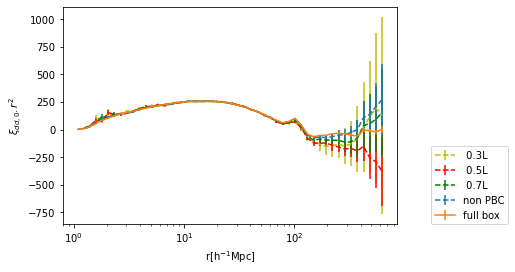

In [77]:
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.errorbar(rdd, xi_03*rdd**2, fmt ='y--', yerr = error_xi_03*rdd**2, label=" 0.3L")
ax.errorbar(rdd, xi_05*rdd**2, fmt ='r--', yerr = error_xi_05*rdd**2, label=" 0.5L")
ax.errorbar(rdd, xi_07*rdd**2, fmt ='g--', yerr = error_xi_07*rdd**2, label=" 0.7L")
ax.errorbar(rdd, xi_f *rdd**2, fmt ='--', yerr = error_xi_f*rdd**2, label="non PBC")
ax.errorbar(rdd, xi_dd*rdd**2, fmt ='-', yerr = error_xi_dd*rdd**2, label="full box")
ax.set_ylabel("$\\xi_{dd,0}.r^2$")
ax.set_xlabel("r[h$^{-1}$Mpc]")
#ax.set_xlim(100,)
#ax.set_ylim(-8000,8000)
ax.legend(loc=(1.1,0))
#plt.savefig('dd-cutbox-correct.pdf')
#plt.savefig('dd-cutbox-correct.png')

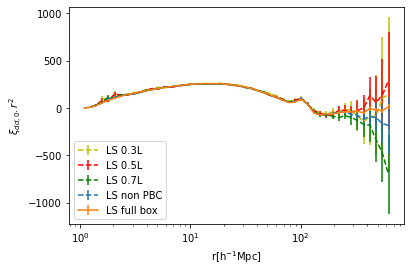

In [78]:
#plot LS estimator
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.errorbar(rdd, xi_03_LS*rdd**2, fmt ='y--', yerr = error_xi_03_LS*rdd**2, label="LS 0.3L")
ax.errorbar(rdd, xi_05_LS*rdd**2, fmt ='r--', yerr = error_xi_05_LS*rdd**2, label="LS 0.5L")
ax.errorbar(rdd, xi_07_LS*rdd**2, fmt ='g--', yerr = error_xi_07_LS*rdd**2, label="LS 0.7L")
ax.errorbar(rdd, xi_LS *rdd**2, fmt ='--', yerr = error_xi_LS*rdd**2, label="LS non PBC")
ax.errorbar(rdd, xi_pbc_LS*rdd**2, fmt ='-', yerr = error_xi_pbc_LS*rdd**2, label="LS full box")
ax.set_ylabel("$\\xi_{dd,0}.r^2$")
ax.set_xlabel("r[h$^{-1}$Mpc]")
#ax.set_xlim(100,)
#ax.set_ylim(-8000,8000)
ax.legend()#(loc=(1.1,0))
#plt.savefig('dd-cutbox-correct.pdf')
#plt.savefig('dd-cutbox-correct.png')

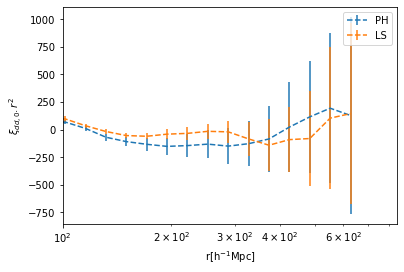

In [129]:
#compare LS to PH
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.errorbar(rdd, xi_03*rdd**2, fmt ='--', yerr = error_xi_03*rdd**2, label="PH")
ax.errorbar(rdd, xi_03_LS*rdd**2, fmt ='--', yerr = error_xi_03_LS*rdd**2, label="LS")
#ax.errorbar(rdd, xi_f *rdd**2, fmt ='--', yerr = error_xi_f*rdd**2, label="non PBC")
#ax.errorbar(rdd, xi_LS *rdd**2, fmt ='--', yerr = error_xi_LS*rdd**2, label="LS non PBC")
#ax.errorbar(rdd, xi_dd*rdd**2, fmt ='-', yerr = error_xi_dd*rdd**2, label="full box")
#ax.errorbar(rdd, xi_pbc_LS*rdd**2, fmt ='-', yerr = error_xi_pbc_LS*rdd**2, label="LS PBC")
ax.set_ylabel("$\\xi_{dd,0}.r^2$")
ax.set_xlabel("r[h$^{-1}$Mpc]")
ax.set_xlim(100,)
#ax.set_ylim(-8000,8000)
ax.legend()#(loc=(1.1,0))
#plt.savefig('dd-cutbox-correct.pdf')
#plt.savefig('dd-cutbox-correct.png')

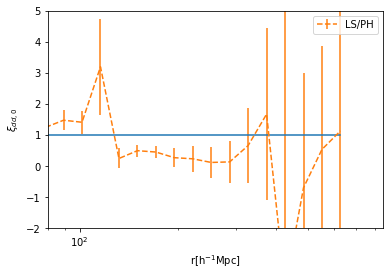

In [130]:
#compare LS to PH, plot the ratio
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.plot(rdd, xi_03/xi_03)
ax.errorbar(rdd, xi_03_LS/xi_03, fmt ='--', yerr = error_xi_03_LS/xi_03, label="LS/PH")
#ax.plot(rdd, xi_f/xi_f)
#ax.errorbar(rdd, xi_LS /xi_f, fmt ='--', yerr = error_xi_LS/xi_f, label="LS non PBC")
#ax.plot(rdd, xi_dd/xi_dd)
#ax.errorbar(rdd, xi_pbc_LS/xi_dd, fmt ='-', yerr = error_xi_pbc_LS/xi_dd, label="LS PBC")
ax.set_ylabel("$\\xi_{dd,0}$")
ax.set_xlabel("r[h$^{-1}$Mpc]")
ax.set_xlim(80,)
ax.set_ylim(-2,5)
ax.legend()#(loc=(1.1,0))
#plt.savefig('dd-cutbox-correct.pdf')
#plt.savefig('dd-cutbox-correct.png')